In [4]:
# Import libraries 
import numpy as np
import math
import os
import matplotlib.pyplot as plt
from random import seed
from random import random
from scipy.optimize import minimize
from random import randint
from scipy.optimize import minimize, rosen, rosen_der
from __future__ import division
import numpy as np
import math
import matplotlib.pylab as plt
import sympy as sp
from numpy.linalg import inv


In [73]:
# Generate the values of X Y and Z coordinates 
seed(111)
x = []
y = []
z = []
for _ in range(14):
  i = 40 
  value1 = random()
  x.append(value1)
  #print(value)
for _ in range(14):
  value2 = random()
  y.append(value2)
  #print(value)
for _ in range(14):
  value3 = random()
  z.append(value3)
print(x,y,z)

[0.827170565342314, 0.21276311517617263, 0.9425194436011797, 0.49391971673226975, 0.3975871534419906, 0.6171646774684565, 0.16962941460111325, 0.19361217094892524, 0.42164500474248356, 0.22970448570930002, 0.6704298068806634, 0.41623153404520497, 0.38353495832202344, 0.2777463300387698] [0.2207885817162396, 0.716191356812786, 0.9025521335945361, 0.3502399586135774, 0.8040414306008918, 0.31313469765916013, 0.760409926484713, 0.23877406038049276, 0.5687112022313325, 0.4074439634684711, 0.8709178300582484, 0.7612946965408907, 0.107791820862428, 0.09929772718869623] [0.4600412614040167, 0.2152795518990661, 0.23788244187374308, 0.9511189423522798, 0.9406546861214974, 0.01749038473908382, 0.02223905489293687, 0.6269637160239108, 0.9476101746191393, 0.8884754177262699, 0.6929726548558099, 0.739502359144883, 0.48283619329998717, 0.4897713358561925]


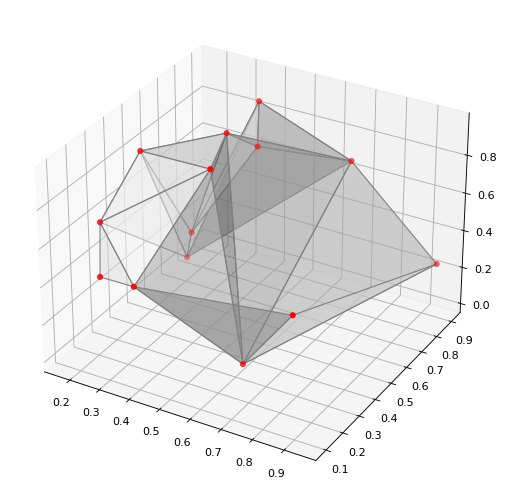

In [74]:
fig = plt.figure(figsize=(10, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z, color='white', edgecolors='grey', alpha=0.5)
ax.scatter(x, y, z, c='red')
plt.show()

In [75]:
# function and the first derivative
def f_1(params): #definite function and first derivative output
    x, y, z = params #amount of params
    der = np.zeros_like(params)
    rstr = x**2 + y**2 + z**2
    der[0] = -2*beta*np.exp(-2*beta*(rstr-1))*2*x + 2*beta*np.exp(-beta*(rstr-1))*2*x# derivative by x
    der[1] = -2*beta*np.exp(-2*beta*(rstr-1))*2*y + 2*beta*np.exp(-beta*(rstr-1))*2*y # derivative by y 
    der[2] = -2*beta*np.exp(-2*beta*(rstr-1))*2*z + 2*beta*np.exp(-beta*(rstr-1))*2*z# derivative by z
    return der


In [76]:
# Generate the atom coordinates 
def atom_coord(N):  # Number of lists and Number of atoms
    list1 = []
    i = 0
    seed(25)
    for i in range(N):
        #for num2 in range(N - 1):
        value1 = random()
        value2 = random()
        value3 = random()
        list1.append([value1,value2,value3])
    return(list1)

In [77]:
# testing  4 atoms mean 4 coordinates for x, y , z
atom_coord(4)

[[0.376962302390386, 0.9267885077263207, 0.8434467391322422],
 [0.21404576995204339, 0.8717081122454375, 0.6364617457506916],
 [0.04239212615820076, 0.9529720601244589, 0.25568366821646715],
 [0.305900980269444, 0.4240801565062292, 0.5885140140252595]]

In [78]:
# Calculating the distances between the points
def distance(x1,x2,y1,y2,z1,z2):
    r = 0.0
    xd = (x2 -x1)
    yd = (y2 -y1)
    zd = (z2 -z1)
    distance = math.hypot(x2 - x1, y2 - y1,z2 - z1)
    return distance,xd**2,yd**2,zd**2

In [79]:
def fUstr(rstr): #definite function
    beta = 6
    n = len(rstr)
    Uv = []
    for i in range(n):
        U = (1 - np.exp(-beta*(rstr[i] - 1)))**2 - 1
    Uv.append(np.sum(U))
    return Uv

In [80]:
fUstr([.11])

[43060.5249315264]

In [81]:
def total_dist(ml):  # ml is a list of pairs of x,y,z points
    n = len(ml)
    total = 0.0
    for i in range (n):
        x1 = ml[i][0]
        y1 = ml[i][1]
        z1 = ml[i][2]
        if i < n-1:
            x2 = ml[i+1][0]
            y2 = ml[i+1][1]
            z2 = ml[i+1][2]
        else:
            x2 = ml[0][0]
            y2 = ml[0][1]
            z2 = ml[0][2]
        dist,xd,yd,zd = distance(x1,y1,x2,y2,z1,z2)
        
        total += dist
    return total,xd,yd,zd

In [82]:
x = 0
y = 0
z = 0


In [83]:
# Plot of U vs r

counterN = 2
rvalues = []
Ustrsd = []
beta = 6
xvv = []
yvv = []
zvv = []
Nv = []
dE2 = []

while counterN < 15:
  
  Nv.append(counterN)
  print("Number of atoms -- >",counterN)
  atom_list = atom_coord(counterN)
  print("Atom Coordinates =",atom_list)
  
  totald,xv,yv,zv = (total_dist(atom_list))
  xvv.append(xv)
  yvv.append(yv)
  zvv.append(zv)
  rvalues.append(totald)
  print("value of r:", rvalues )
  
  Ustrs = fUstr(rvalues)
  Ustrsd.append((Ustrs))
  print("UNvalues ===>", Ustrsd)
  print("==========================")
  counterN = counterN + 1

Number of atoms -- > 2
Atom Coordinates = [[0.376962302390386, 0.9267885077263207, 0.8434467391322422], [0.21404576995204339, 0.8717081122454375, 0.6364617457506916]]
value of r: [1.7637135822237209]
UNvalues ===> [[-0.020358368841618013]]
Number of atoms -- > 3
Atom Coordinates = [[0.376962302390386, 0.9267885077263207, 0.8434467391322422], [0.21404576995204339, 0.8717081122454375, 0.6364617457506916], [0.04239212615820076, 0.9529720601244589, 0.25568366821646715]]
value of r: [1.7637135822237209, 3.2831770710761834]
UNvalues ===> [[-0.020358368841618013], [-2.246997207300261e-06]]
Number of atoms -- > 4
Atom Coordinates = [[0.376962302390386, 0.9267885077263207, 0.8434467391322422], [0.21404576995204339, 0.8717081122454375, 0.6364617457506916], [0.04239212615820076, 0.9529720601244589, 0.25568366821646715], [0.305900980269444, 0.4240801565062292, 0.5885140140252595]]
value of r: [1.7637135822237209, 3.2831770710761834, 3.6620313502653463]
UNvalues ===> [[-0.020358368841618013], [-2.2

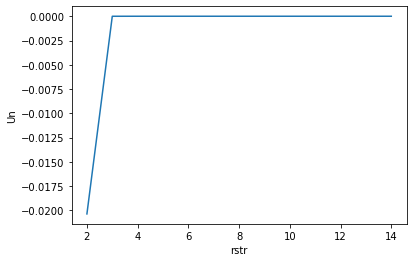

In [84]:
xx = np.arange(2,15)
plt.plot(xx,Ustrsd)
plt.xlabel('rstr')
plt.ylabel('Un')
plt.show()


In [85]:
print(Ustrsd)

new_Ustrsd = [items for sublist in Ustrsd for items in sublist]
print('Urstr= ',new_Ustrsd)

[[-0.020358368841618013], [-2.246997207300261e-06], [-2.3141782856672677e-07], [-1.9841737142201055e-09], [-8.186096245310637e-11], [-1.318944953254686e-13], [-2.4424906541753444e-15], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]
Urstr=  [-0.020358368841618013, -2.246997207300261e-06, -2.3141782856672677e-07, -1.9841737142201055e-09, -8.186096245310637e-11, -1.318944953254686e-13, -2.4424906541753444e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [86]:
ir = 1
dE22 = []


for i in range(len(new_Ustrsd) -1):
  a = (np.sum(new_Ustrsd[i+1] + new_Ustrsd[i - 1]  + 2*new_Ustrsd[i]) ) 
  ir = ir + 1
  #print(a)
  dE22.append(a)
print(dE22)

[-0.040718984680443326, -0.02036309425386118, -2.7118170381479345e-06, -2.3546803695762009e-07, -2.1480275336216437e-09, -8.212719393441148e-11, -1.3677947663381929e-13, -2.4424906541753444e-15, 0.0, 0.0, 0.0, 0.0]


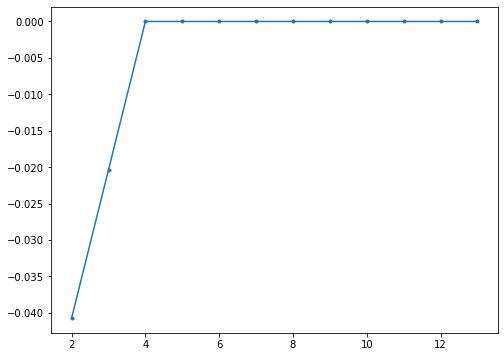

In [87]:
NN = np.arange(2,14)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(NN,dE22, marker='.')

In [88]:
# Minimization with Newton Raphson 

In [89]:

def Newton_Raphson_Optimize(Grad, Hess, x,y,z, epsilon=0.001, nMax = 14):
    #Initialization
    i = 0
    iter_x, iter_y, iter_z,iter_count = np.empty(0),np.empty(0),np.empty(0), np.empty(0)
    error = 5
    X = np.array([x,y,z])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_z = np.append(iter_z,z)
        iter_count = np.append(iter_count ,i)   
        print(X) 
        
        X_prev = X
        X = X - np.linalg.pinv(Hess(x,y,z)) @ Grad(x,y,z)
        error = X - X_prev
        x,y,z = X[0], X[1], X[2]
          
    return X, iter_x,iter_y,iter_z, iter_count




In [90]:
def funcr(x,y,z):
    rr = np.sqrt(x**2+y**2+z**2)
    return (1 - np.exp(-beta*(rr - 1 ) ))**2 - 1

In [91]:
def grad(x,y,z):
    beta = 6
    rr = np.sqrt(x**2+y**2+z**2)
    g1 = 2*beta*x*( np.exp(-beta*(rr - 1 ) ) - 1 )*np.exp(-2*beta*(rr - 1 ) )/rr
    g2 = 2*beta*y*( np.exp(-beta*(rr - 1 ) ) - 1 )*np.exp(-2*beta*(rr - 1 ) )/rr
    g3 = 2*beta*z*( np.exp(-beta*(rr - 1 ) ) - 1 )*np.exp(-2*beta*(rr - 1 ) )/rr
    return np.array([g1,g2,g3])

In [92]:
def Hgradd(x,y,z):
    rr = np.sqrt(x**2+y**2+z**2)
    h11 = 2*beta*(  beta*x**2*(2-np.exp(-beta*(rr - 1 ))*rr**2) + x**2*(1-np.exp(-beta*(rr - 1 ) ))*rr**1.5)*np.exp(-2*beta*(rr - 1 ) )/rr**3
    h12 = 2*beta*(  beta*y**2*(2-np.exp(-beta*(rr - 1 ))*rr**2) + y**2*(1-np.exp(-beta*(rr - 1 ) ))*rr**1.5)*np.exp(-2*beta*(rr - 1 ) )/rr**3
    h13 = 2*beta*(  beta*z**2*(2-np.exp(-beta*(rr - 1 ))*rr**2) + z**2*(1-np.exp(-beta*(rr - 1 ) ))*rr**1.5)*np.exp(-2*beta*(rr - 1 ) )/rr**3
    h21 = 2*beta*(  beta*x**2*(2-np.exp(-beta*(rr - 1 ))*rr**2) + x**2*(1-np.exp(-beta*(rr - 1 ) ))*rr**1.5)*np.exp(-2*beta*(rr - 1 ) )/rr**3
    h22 = 2*beta*(  beta*y**2*(2-np.exp(-beta*(rr - 1 ))*rr**2) + y**2*(1-np.exp(-beta*(rr - 1 ) ))*rr**1.5)*np.exp(-2*beta*(rr - 1 ) )/rr**3
    h23 = 2*beta*(  beta*z**2*(2-np.exp(-beta*(rr - 1 ))*rr**2) + z**2*(1-np.exp(-beta*(rr - 1 ) ))*rr**1.5)*np.exp(-2*beta*(rr - 1 ) )/rr**3
    h31 = 2*beta*(  beta*x**2*(2-np.exp(-beta*(rr - 1 ))*rr**2) + x**2*(1-np.exp(-beta*(rr - 1 ) ))*rr**1.5)*np.exp(-2*beta*(rr - 1 ) )/rr**3
    h32 = 2*beta*(  beta*y**2*(2-np.exp(-beta*(rr - 1 ))*rr**2) + y**2*(1-np.exp(-beta*(rr - 1 ) ))*rr**1.5)*np.exp(-2*beta*(rr - 1 ) )/rr**3
    h33 = 2*beta*(  beta*z**2*(2-np.exp(-beta*(rr - 1 ))*rr**2) + z**2*(1-np.exp(-beta*(rr - 1 ) ))*rr**1.5)*np.exp(-2*beta*(rr - 1 ) )/rr**3
    return np.array([ [h11,h12,h13], [h21,h22,h23],[h31,h32,h33]])                         


Minimization Results
Num of atoms =  2
[0.04137218 0.30230886 0.08057887]
[0.04628845 0.56480373 0.09922812]
[0.04733679 0.72088509 0.10404566]
[0.04811549 0.90147964 0.10780768]
[0.04785307 0.8093615  0.10649023]
[0.04942853 1.26004731 0.11429228]
[0.04948109 1.294204   0.1145733 ]
[0.04953287 1.32962525 0.1148509 ]
[0.0495836  1.36617907 0.11512364]
[0.0496331  1.40376058 0.1153905 ]
[0.04968127 1.44228816 0.11565083]
[0.04972803 1.48169955 0.11590423]
[0.04977337 1.52194817 0.11615051]
[0.04981727 1.56299992 0.11638961]
[0.04985977 1.60483042 0.11662157]
[0.04137218 0.04628845 0.04733679 0.04811549 0.04785307 0.04942853
 0.04948109 0.04953287 0.0495836  0.0496331  0.04968127 0.04972803
 0.04977337 0.04981727]
Min U  137.8297808669188
Minimization Results
Num of atoms =  3
[0.04137218 0.30230886 0.08057887]
[0.04628845 0.56480373 0.09922812]
[0.04733679 0.72088509 0.10404566]
[0.04811549 0.90147964 0.10780768]
[0.04785307 0.8093615  0.10649023]
[0.04942853 1.26004731 0.11429228]
[0.0

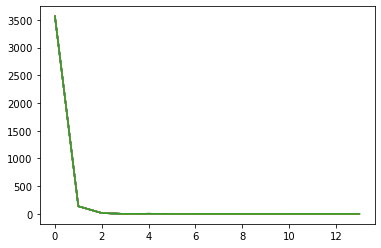

In [101]:
counter = 0
minuL = []
for i in range(2,15):
    print("Minimization Results")
    print("Num of atoms = ", i)
    root,iter_x,iter_y,iter_z ,iter_count = Newton_Raphson_Optimize(grad,Hgradd,xv,yv,zv)
    
    print(root)
    print(iter_x)
    min_U = funcr(iter_x,iter_y,iter_z)
    counter = counter+1
    print("Min U ",min_U[counter])
    aa = min_U[counter]
    plt.plot(min_U)
    i = i + 1    


[array([ 3.56695748e+03,  1.37829781e+02,  1.54542285e+01, -4.75100284e-01,
        2.93986617e+00, -3.63962680e-01, -3.02930756e-01, -2.49335660e-01,
       -2.03205991e-01, -1.64163035e-01, -1.31582323e-01, -1.04719446e-01,
       -8.27991347e-02, -6.50729233e-02]), array([ 3.56695748e+03,  1.37829781e+02,  1.54542285e+01, -4.75100284e-01,
        2.93986617e+00, -3.63962680e-01, -3.02930756e-01, -2.49335660e-01,
       -2.03205991e-01, -1.64163035e-01, -1.31582323e-01, -1.04719446e-01,
       -8.27991347e-02, -6.50729233e-02]), array([ 3.56695748e+03,  1.37829781e+02,  1.54542285e+01, -4.75100284e-01,
        2.93986617e+00, -3.63962680e-01, -3.02930756e-01, -2.49335660e-01,
       -2.03205991e-01, -1.64163035e-01, -1.31582323e-01, -1.04719446e-01,
       -8.27991347e-02, -6.50729233e-02]), array([ 3.56695748e+03,  1.37829781e+02,  1.54542285e+01, -4.75100284e-01,
        2.93986617e+00, -3.63962680e-01, -3.02930756e-01, -2.49335660e-01,
       -2.03205991e-01, -1.64163035e-01, -1.3

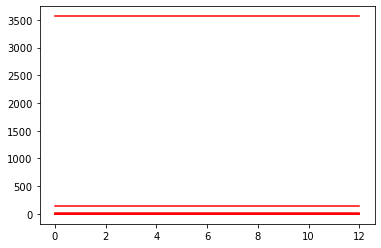

In [94]:
print(minuL)    
plt.plot(minuL, c='red')
plt.show()

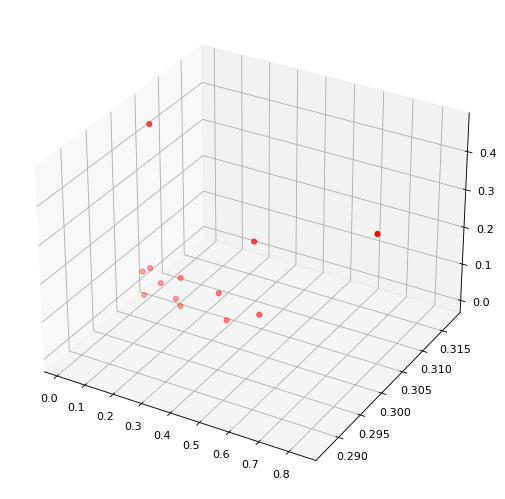

In [95]:
fig = plt.figure(figsize=(10, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xvv, yvv, zvv, c='red')
plt.show()